# NAO data

I copy pasted the data into a txt file and am reading it in. I got the data off: https://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/nao.shtml.

Try and replicate the way they usually represent the data with blue and red bars for the different pahses.

In [176]:
# import packages...

import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import xarray as xr
import pandas as pd

In [304]:
# load data
file_name = '/Users/marie-louisekorte/OneDrive - University of the Highlands and Islands/SAMS Summer Internship/Rockall_Trough_MHW/data/NAO.csv'

#NAO_data = open(file_name, 'r')
#NAO_data = np.loadtxt(file_name, delimiter=',', skiprows=1, dtype = date)

NAO_data = pd.read_csv(file_name, header = 1)

In [324]:
NAO_data.dtypes

Date     datetime64[ns]
Value           float64
dtype: object

In [315]:
NAO_data

,Date,Value
0,195001,0.92
1,195002,0.40
2,195003,-0.36
3,195004,0.73
4,195005,-0.59
...,...,...
851,202012,-0.30
852,202101,-1.11
853,202102,0.14
854,202103,0.73


In [318]:
NAO_data['Date'] = pd.to_datetime(NAO_data['Date'],format='%Y%m')

In [319]:
NAO_data

,Date,Value
0,1950-01-01,0.92
1,1950-02-01,0.40
2,1950-03-01,-0.36
3,1950-04-01,0.73
4,1950-05-01,-0.59
...,...,...
851,2020-12-01,-0.30
852,2021-01-01,-1.11
853,2021-02-01,0.14
854,2021-03-01,0.73


In [326]:
NAO_data.dtypes

Date     datetime64[ns]
Value           float64
dtype: object

In [480]:
positive = NAO_data.Value if NAO_data.Value>0


SyntaxError: invalid syntax (<ipython-input-480-51bd03891a3c>, line 1)

In [407]:

np.array(NAO_data.Value)
np.array(NAO_data.Date)

array(['1950-01-01T00:00:00.000000000', '1950-02-01T00:00:00.000000000',
       '1950-03-01T00:00:00.000000000', '1950-04-01T00:00:00.000000000',
       '1950-05-01T00:00:00.000000000', '1950-06-01T00:00:00.000000000',
       '1950-07-01T00:00:00.000000000', '1950-08-01T00:00:00.000000000',
       '1950-09-01T00:00:00.000000000', '1950-10-01T00:00:00.000000000',
       '1950-11-01T00:00:00.000000000', '1950-12-01T00:00:00.000000000',
       '1951-01-01T00:00:00.000000000', '1951-02-01T00:00:00.000000000',
       '1951-03-01T00:00:00.000000000', '1951-04-01T00:00:00.000000000',
       '1951-05-01T00:00:00.000000000', '1951-06-01T00:00:00.000000000',
       '1951-07-01T00:00:00.000000000', '1951-08-01T00:00:00.000000000',
       '1951-09-01T00:00:00.000000000', '1951-10-01T00:00:00.000000000',
       '1951-11-01T00:00:00.000000000', '1951-12-01T00:00:00.000000000',
       '1952-01-01T00:00:00.000000000', '1952-02-01T00:00:00.000000000',
       '1952-03-01T00:00:00.000000000', '1952-04-01

In [365]:
#NAO_data.plot.bar(x = 'Date', y = 'Value'); #writes all dates in xaxis

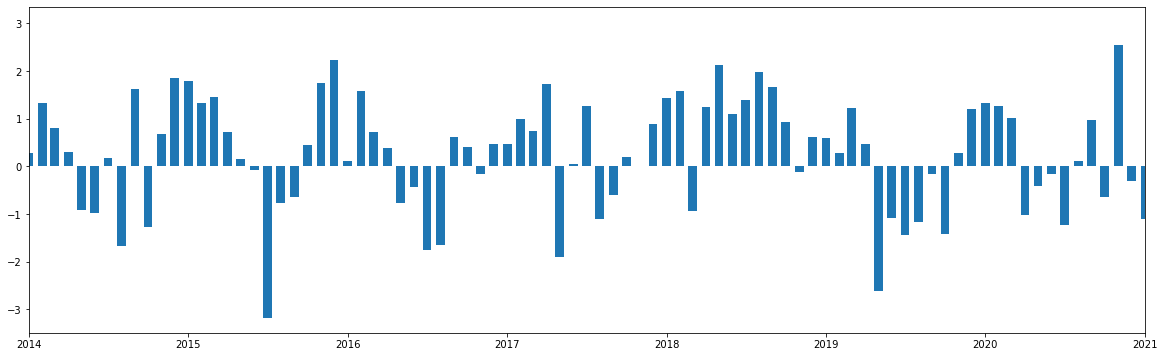

In [408]:
fig, ax=plt.subplots(figsize=(20,6))
ax.bar(NAO_data.Date, NAO_data.Value, width=20)
ax.set_xlim(np.datetime64('2014'), np.datetime64('2021'));

In [464]:
dsNAO=NAO_data.to_xarray()
dsNAO

<xarray.Dataset>
Dimensions:  (index: 856)
Coordinates:
  * index    (index) int64 0 1 2 3 4 5 6 7 8 ... 848 849 850 851 852 853 854 855
Data variables:
    Date     (index) datetime64[ns] 1950-01-01 1950-02-01 ... 2021-04-01
    Value    (index) float64 1.92 1.4 -0.36 1.73 -0.59 ... -1.11 1.14 1.73 -1.43

In [436]:
#dsNAO=dsNAO.drop_vars('index')

In [463]:
#dsNAO.coords['Date'] = dsNAO.Date

In [448]:
#dsNAO.set_dims = dsNAO.Date

In [474]:
dsNAO.Value.bar()

AttributeError: 'DataArray' object has no attribute 'bar'